In [1]:
# Vertical panels, sanity check of results on bifacial_radiance and view factor

In [2]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import bifacial_radiance
import bifacialvf
print(bifacialvf.__version__)
print(bifacial_radiance.__version__)

0.1.7-dev1+73.gf25ac0f.dirty
0.4.1+121.g952f921.dirty


In [3]:
testfolder = r'TEMP\SquareDesign'
if not os.path.exists(testfolder):
    os.makedirs(testfolder)


In [4]:
TMYtoread=bifacialvf.getEPW(lat=37.5407,lon=-77.4360, path = testfolder)
myTMY3, meta = bifacialvf.readInputTMY(TMYtoread)

path = C:\Users\sayala\Documents\GitHub\Studies\SouthPole\Journals\TEMP\SquareDesign
Getting weather file: USA_VA_Richmond.724010_TMY2.epw
 ... OK!


In [5]:
myTMY3.keys()

Index(['year', 'month', 'day', 'hour', 'minute', 'data_source_unct', 'DryBulb',
       'temp_dew', 'relative_humidity', 'atmospheric_pressure', 'etr', 'etrn',
       'ghi_infrared', 'GHI', 'DNI', 'DHI', 'global_hor_illum',
       'direct_normal_illum', 'diffuse_horizontal_illum', 'zenith_luminance',
       'wind_direction', 'Wspd', 'total_sky_cover', 'opaque_sky_cover',
       'visibility', 'ceiling_height', 'present_weather_observation',
       'present_weather_codes', 'precipitable_water', 'aerosol_optical_depth',
       'snow_depth', 'days_since_last_snowfall', 'Alb',
       'liquid_precipitation_depth', 'liquid_precipitation_quantity'],
      dtype='object')

In [6]:
testfolder

'TEMP\\SquareDesign'

In [7]:
meta

{'loc': 'LOCATION',
 'city': 'RICHMOND',
 'state-prov': 'VA',
 'country': 'USA',
 'data_type': 'TMY2-13740',
 'WMO_code': '724010',
 'latitude': 37.5,
 'longitude': -77.33,
 'TZ': -5.0,
 'altitude': 50.0}

In [8]:
rawfile = r'..\..\SAM_SP_WeatherFile.csv'
demo = bifacial_radiance.RadianceObj("SouthPole")  # Create a RadianceObj 'object'
demo.setGround(0.7)
metdata = demo.readWeatherFile(rawfile, source='SAM') 

path = C:\Users\sayala\Documents\GitHub\Studies\SouthPole\Journals\TEMP\SquareDesign
Loading albedo, 1 value(s), 0.700 avg
1 nonzero albedo values.
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is left-labeled  with a delta of +30 mins. i.e. 12 is 12:30 sunpos.


C:\Users\sayala\Documents\GitHub\pvlib-python\pvlib\spa.py:1200: RuntimeWarning: invalid value encountered in remainder
  H0 = np.degrees(np.arccos(cos_arg)) % 180
C:\Users\sayala\Documents\GitHub\pvlib-python\pvlib\spa.py:1211: RuntimeWarning: invalid value encountered in remainder
  m[1] = m[1] % 1
C:\Users\sayala\Documents\GitHub\pvlib-python\pvlib\spa.py:1212: RuntimeWarning: invalid value encountered in remainder
  m[2] = m[2] % 1
C:\Users\sayala\Documents\GitHub\pvlib-python\pvlib\spa.py:1229: RuntimeWarning: invalid value encountered in remainder
  Hp = (vs + lon - alpha_prime) % 360


In [9]:
meta['city'] = metdata.city
meta['latitude'] = metdata.latitude
meta['longitude'] = metdata.longitude
meta['altitude'] = metdata.elevation
meta['data_type'] = 'SAM'
meta['country'] = 'Antarctica'
meta['loc'] = 'SP'
meta['state-prov'] = 'SP'


In [10]:
myTMY3.keys()

Index(['year', 'month', 'day', 'hour', 'minute', 'data_source_unct', 'DryBulb',
       'temp_dew', 'relative_humidity', 'atmospheric_pressure', 'etr', 'etrn',
       'ghi_infrared', 'GHI', 'DNI', 'DHI', 'global_hor_illum',
       'direct_normal_illum', 'diffuse_horizontal_illum', 'zenith_luminance',
       'wind_direction', 'Wspd', 'total_sky_cover', 'opaque_sky_cover',
       'visibility', 'ceiling_height', 'present_weather_observation',
       'present_weather_codes', 'precipitable_water', 'aerosol_optical_depth',
       'snow_depth', 'days_since_last_snowfall', 'Alb',
       'liquid_precipitation_depth', 'liquid_precipitation_quantity'],
      dtype='object')

In [11]:
df = pd.DataFrame()
df['DNI'] = metdata.dni
df['GHI'] = metdata.ghi
df['DHI'] = metdata.dhi
df['DryBulb'] = metdata.temp_air
df['Wspd'] = metdata.wind_speed
df['datetime'] = metdata.datetime


In [12]:
df.set_index('datetime', inplace=True)

In [13]:
deltastyle = 'SAM'  # 
tilt = 90                   # PV tilt (deg)
sazm = 180                  # PV Azimuth(deg) or tracker axis direction
albedo = 0.80               # ground albedo
clearance_height = 0.3
pitch = 4                   # row to row spacing in normalized panel lengths. 
rowType = "interior"        # RowType(first interior last single)
transFactor = 0.013         # TransmissionFactor(open area fraction)
sensorsy = 12                # sensorsy(# hor rows in panel)   <--> THIS ASSUMES LANDSCAPE ORIENTATION 
PVfrontSurface = "glass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "glass"     # PVbackSurface(glass or ARglass)

# Calculate PV Output Through Various Methods    
# This variables are advanced and explored in other tutorials.
#calculateBilInterpol = True         # Only works with landscape at the moment.
#calculatePVMismatch = True
#portraitorlandscape='landscape'   # portrait or landscape
#cellsnum = 72
#bififactor = 1.0
#agriPV = True                       # Returns ground irradiance values

# Tracking instructions
tracking=False
backtrack=False
limit_angle = 90



In [14]:
sazm = 180                  # PV Azimuth(deg) or tracker axis direction
writefiletitle = os.path.join(testfolder, 'South_Facing.csv')
#myTMY3 = myTMY3.iloc[0:24].copy()  # Simulate just the first 24 hours of the data file for speed on this example
bifacialvf.simulate(df, meta, writefiletitle=writefiletitle, 
         tilt=tilt, sazm=sazm, pitch=pitch, clearance_height=clearance_height, 
         rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
         PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
         albedo=albedo, tracking=tracking, backtrack=backtrack, 
         limit_angle=limit_angle, deltastyle=deltastyle)



C:\Users\sayala\Documents\GitHub\pvlib-python\pvlib\spa.py:1200: RuntimeWarning: invalid value encountered in remainder
  H0 = np.degrees(np.arccos(cos_arg)) % 180
C:\Users\sayala\Documents\GitHub\pvlib-python\pvlib\spa.py:1211: RuntimeWarning: invalid value encountered in remainder
  m[1] = m[1] % 1
C:\Users\sayala\Documents\GitHub\pvlib-python\pvlib\spa.py:1212: RuntimeWarning: invalid value encountered in remainder
  m[2] = m[2] % 1
C:\Users\sayala\Documents\GitHub\pvlib-python\pvlib\spa.py:1229: RuntimeWarning: invalid value encountered in remainder
  Hp = (vs + lon - alpha_prime) % 360


Calculating Sun position with a delta of +30 mins. i.e. 12 is 12:30 sunpos
 
********* 
Running Simulation for TMY3: 
Location:   NOAA
Lat:  -89.98  Long:  -24.8  Tz  -5.0
Parameters: tilt:  90   Sazm:  180     Clearance_Height :  0.3   Pitch:  4   Row type:  interior   Albedo:  0.8
Saving into TEMP\SquareDesign\South_Facing.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  2.356603883763919
Actual distance between rows =  4.0
 


100%|██████████████████████████████████████████████████████████████████████████████| 4181/4181 [00:49<00:00, 84.15it/s]

Finished


In [15]:
sazm = 90                  # PV Azimuth(deg) or tracker axis direction

writefiletitle = os.path.join(testfolder, 'East_Facing.csv')
#myTMY3 = myTMY3.iloc[0:24].copy()  # Simulate just the first 24 hours of the data file for speed on this example
bifacialvf.simulate(df, meta, writefiletitle=writefiletitle, 
         tilt=tilt, sazm=sazm, pitch=pitch, clearance_height=clearance_height, 
         rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
         PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
         albedo=albedo, tracking=tracking, backtrack=backtrack, 
         limit_angle=limit_angle, deltastyle=deltastyle)



 
********* 
Running Simulation for TMY3: 
Location:   NOAA
Lat:  -89.98  Long:  -24.8  Tz  -5.0
Parameters: tilt:  90   Sazm:  90     Clearance_Height :  0.3   Pitch:  4   Row type:  interior   Albedo:  0.8
Saving into TEMP\SquareDesign\East_Facing.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.2724629035587559
Actual distance between rows =  4.0
 


100%|██████████████████████████████████████████████████████████████████████████████| 4181/4181 [00:50<00:00, 83.58it/s]

Finished


In [17]:
pwd

'C:\\Users\\sayala\\Documents\\GitHub\\Studies\\SouthPole\\Journals\\TEMP\\SquareDesign'

In [16]:
writefiletitle

'TEMP\\SquareDesign\\East_Facing.csv'

In [33]:
sazm = 270                  # PV Azimuth(deg) or tracker axis direction

writefiletitle = os.path.join(testfolder, 'West_Facing.csv')
#myTMY3 = myTMY3.iloc[0:24].copy()  # Simulate just the first 24 hours of the data file for speed on this example
bifacialvf.simulate(df, meta, writefiletitle=writefiletitle, 
         tilt=tilt, sazm=sazm, pitch=pitch, clearance_height=clearance_height, 
         rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
         PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
         albedo=albedo, tracking=tracking, backtrack=backtrack, 
         limit_angle=limit_angle, deltastyle=deltastyle)



 
********* 
Running Simulation for TMY3: 
Location:   NOAA
Lat:  -89.98  Long:  -24.8  Tz  -5.0
Parameters: tilt:  90   Sazm:  270     Clearance_Height :  0.5   Pitch:  3   Row type:  interior   Albedo:  0.8
Saving into TEMP\SquareDesign\West_Facing.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  -0.27246290355875563
Actual distance between rows =  3.0
 


100%|██████████████████████████████████████████████████████████████████████████████| 4181/4181 [00:45<00:00, 91.25it/s]

Finished


In [34]:
sazm = 0                  # PV Azimuth(deg) or tracker axis direction

writefiletitle = os.path.join(testfolder, 'North_Facing.csv')
#myTMY3 = myTMY3.iloc[0:24].copy()  # Simulate just the first 24 hours of the data file for speed on this example
bifacialvf.simulate(df, meta, writefiletitle=writefiletitle, 
         tilt=tilt, sazm=sazm, pitch=pitch, clearance_height=clearance_height, 
         rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
         PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
         albedo=albedo, tracking=tracking, backtrack=backtrack, 
         limit_angle=limit_angle, deltastyle=deltastyle)



 
********* 
Running Simulation for TMY3: 
Location:   NOAA
Lat:  -89.98  Long:  -24.8  Tz  -5.0
Parameters: tilt:  90   Sazm:  0     Clearance_Height :  0.5   Pitch:  3   Row type:  interior   Albedo:  0.8
Saving into TEMP\SquareDesign\North_Facing.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  -2.356603883763919
Actual distance between rows =  3.0
 


100%|██████████████████████████████████████████████████████████████████████████████| 4181/4181 [00:45<00:00, 91.81it/s]

Finished


In [65]:
pwd


'C:\\Users\\sayala\\Documents\\GitHub\\Studies\\SouthPole\\Journals\\TEMP\\SquareDesign'

In [37]:
fileNorth = r'Temp\SquareDesign\North_Facing.csv'
fileEast = r'Temp\SquareDesign\East_Facing.csv'
fileSouth = r'Temp\SquareDesign\South_Facing.csv'
fileWest = r'Temp\SquareDesign\West_Facing.csv'

In [38]:
(dataN, metadata) = bifacialvf.loadVFresults(fileNorth)
(dataE, metadata) = bifacialvf.loadVFresults(fileEast)
(dataS, metadata) = bifacialvf.loadVFresults(fileSouth)
(dataW, metadata) = bifacialvf.loadVFresults(fileWest)

In [70]:
col_Front = [col for col in dataN.columns if col.endswith('_RowFrontGTI')]
col_Back = [col for col in dataN.columns if col.endswith('_RowBackGTI')]

dataN['GTIFrontavg'] = dataN[col_Front].mean(axis=1)
dataN['GTIBackavg'] = dataN[col_Back].mean(axis=1)*0.6
dataE['GTIFrontavg'] = dataE[col_Front].mean(axis=1)
dataE['GTIBackavg'] = dataE[col_Back].mean(axis=1)*0.6
dataS['GTIFrontavg'] = dataS[col_Front].mean(axis=1)
dataS['GTIBackavg'] = dataS[col_Back].mean(axis=1)*0.6
dataW['GTIFrontavg'] = dataW[col_Front].mean(axis=1)
dataW['GTIBackavg'] = dataW[col_Back].mean(axis=1)*0.6


In [48]:
dataN['POA'] = (dataN[col_Front] + dataN[col_Back].values*0.6).mean(axis=1)
dataE['POA'] = (dataE[col_Front] + dataE[col_Back].values*0.6).mean(axis=1)
dataS['POA'] = (dataS[col_Front] + dataS[col_Back].values*0.6).mean(axis=1)
dataW['POA'] = (dataW[col_Front] + dataW[col_Back].values*0.6).mean(axis=1)

POAN= (dataN[col_Front] + dataN[col_Back].values*0.6)
POAE = (dataE[col_Front] + dataE[col_Back].values*0.6)
POAS = (dataS[col_Front] + dataS[col_Back].values*0.6)
POAW = (dataW[col_Front] + dataW[col_Back].values*0.6)


In [52]:
dataN['nonuniformity'] = (POAN.max()-POAN.min())/(0.5*POAN.max()+POAN.min())
dataE['nonuniformity'] = (POAE.max()-POAE.min())/(0.5*POAE.max()+POAE.min())
dataS['nonuniformity'] = (POAS.max()-POAS.min())/(0.5*POAS.max()+POAS.min())
dataW['nonuniformity'] = (POAW.max()-POAW.min())/(0.5*POAW.max()+POAW.min())

In [53]:
import matplotlib.pyplot as plt


In [59]:
dataN.set_index(pd.to_datetime(dataN['date']), inplace=True, drop=True)
dataE.set_index(pd.to_datetime(dataE['date']), inplace=True, drop=True)
dataS.set_index(pd.to_datetime(dataS['date']), inplace=True, drop=True)
dataW.set_index(pd.to_datetime(dataW['date']), inplace=True, drop=True)


In [73]:
data.keys()

Index(['date', 'DNI', 'DHI', 'albedo', 'decHRs', 'ghi', 'inc', 'zen', 'azm',
       'pvFrontSH', 'aveFrontGroundGHI', 'GTIfrontBroadBand', 'pvBackSH',
       'aveBackGroundGHI', 'GTIbackBroadBand', 'maxShadow', 'Tamb', 'VWind',
       'No_1_RowFrontGTI', 'No_2_RowFrontGTI', 'No_3_RowFrontGTI',
       'No_4_RowFrontGTI', 'No_5_RowFrontGTI', 'No_6_RowFrontGTI',
       'No_7_RowFrontGTI', 'No_8_RowFrontGTI', 'No_9_RowFrontGTI',
       'No_10_RowFrontGTI', 'No_11_RowFrontGTI', 'No_12_RowFrontGTI',
       'No_1_RowBackGTI', 'No_2_RowBackGTI', 'No_3_RowBackGTI',
       'No_4_RowBackGTI', 'No_5_RowBackGTI', 'No_6_RowBackGTI',
       'No_7_RowBackGTI', 'No_8_RowBackGTI', 'No_9_RowBackGTI',
       'No_10_RowBackGTI', 'No_11_RowBackGTI', 'No_12_RowBackGTI',
       'GTIFrontavg', 'GTIBackavg', 'POA', 'nonuniformity'],
      dtype='object')

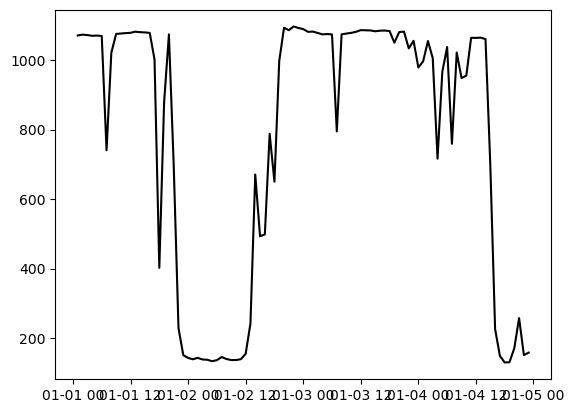

In [84]:
singleday = (data.index > '2021-01-01') & (data.index<'2021-01-05')
fig, ax = plt.subplots()
plt.plot(data.index[singleday],data['ghi'][singleday],'k')
#ax1.plot(data.index[singleday],data['DNI'][singleday],'k')
#ax1.plot(data.index[singleday],data['DHI'][singleday],'k')

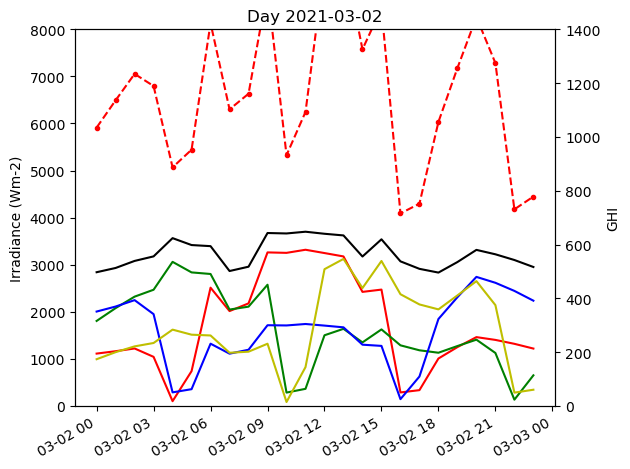

In [111]:
idxstart = '2021-03-02'
idxend = '2021-03-02'
#idxstart = '2021-01-03'
#idxend = '2021-01-03'
#data.loc['2021-01-03':'2021-01-04']

fig, ax = plt.subplots()
ax1 = ax.twinx()
#ax1.plot(data.index[singleday],data['ghi'][singleday],'k')
ax1.plot(dataN.loc[idxstart:idxend].index,dataN.loc[idxstart:idxend].ghi,'k')

ax1.set_ylabel('GHI')
ax.set_ylabel('Irradiance (Wm-2)')
allPOA = (dataN.loc[idxstart:idxend].POA + dataE.loc[idxstart:idxend].POA.values + 
dataS.loc[idxstart:idxend].POA.values + dataW.loc[idxstart:idxend].POA.values)
ax.plot(dataN.loc[idxstart:idxend].index,dataN.loc[idxstart:idxend].POA,'r')
ax.plot(dataN.loc[idxstart:idxend].index,dataE.loc[idxstart:idxend].POA,'g')
ax.plot(dataN.loc[idxstart:idxend].index,dataS.loc[idxstart:idxend].POA,'b')
ax.plot(dataN.loc[idxstart:idxend].index,dataW.loc[idxstart:idxend].POA,'y')
ax.plot(dataN.loc[idxstart:idxend].index,allPOA,'r--.')
ax1.set_ylim([0, 1400])
ax.set_ylim([0, 8000])

ax.set_title('Day '+idxstart)

fig.autofmt_xdate()
fig.tight_layout()


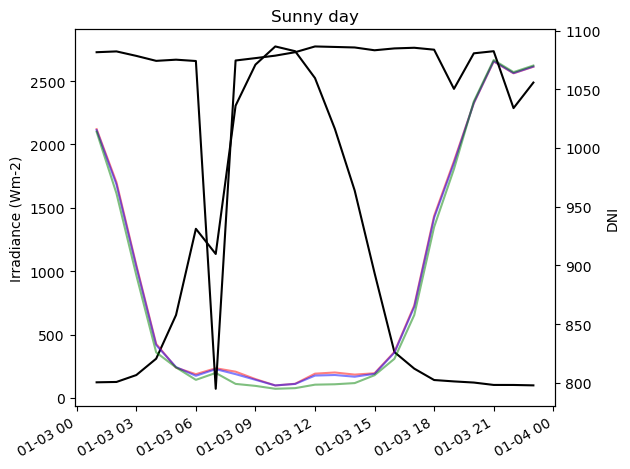

In [77]:
data = dataN.copy()
singleday = (data.index > '2021-01-03') & (data.index<'2021-01-04')

fig, ax = plt.subplots()
ax1 = ax.twinx()
ax1.plot(data.index[singleday],data['ghi'][singleday],'k')
ax1.set_ylabel('DNI')
ax.set_ylabel('Irradiance (Wm-2)')
ax.plot(data.index[singleday],data['GTIFrontavg'][singleday],'k')
ax.plot(data.index[singleday], data['No_1_RowBackGTI'][singleday],'r' , alpha =0.5)
ax.plot(data.index[singleday], data['No_2_RowBackGTI'][singleday], 'b', alpha = 0.5)
ax.plot(data.index[singleday], data['No_6_RowBackGTI'][singleday], 'g', alpha = 0.5)
ax.set_title('Sunny day')
fig.autofmt_xdate()
fig.tight_layout()


In [ ]:
# plot the rear irradiance distribution for a single point in time. 1999-07-06
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

data['GTIBackstd'] = data[['No_1_RowBackGTI', 'No_2_RowBackGTI','No_3_RowBackGTI','No_4_RowBackGTI','No_5_RowBackGTI','No_6_RowBackGTI']].std(axis=1)
data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
singleday = (data.index > '2021-07-09') & (data.index<'2021-07-10')
singleday2 = (data.index > '2021-07-15') & (data.index<'2021-07-16')

fig, ax = plt.subplots()
ax1 = ax.twinx()
ax1.plot(data.index[singleday],data['GTIFrontavg'][singleday],'k')
ax1.set_ylabel('Front Irradiance (Wm-2)')
ax.set_ylabel('Rear Irradiance (Wm-2)')
ax.plot(data.index[singleday], data['No_1_RowBackGTI'][singleday],'r' , alpha =0.5)
ax.plot(data.index[singleday], data['No_2_RowBackGTI'][singleday], 'b', alpha = 0.5)
ax.plot(data.index[singleday], data['No_6_RowBackGTI'][singleday], 'g', alpha = 0.5)
ax.set_title('Sunny day')
fig.autofmt_xdate()
fig.tight_layout()


fig2, ax2 = plt.subplots()
ax3 = ax2.twinx()
ax3.plot(data.index[singleday2],data['GTIFrontavg'][singleday2],'k')
ax3.set_ylabel('Front Irradiance (Wm-2)')
ax2.set_ylabel('Rear Irradiance (Wm-2)')
ax2.plot(data.index[singleday2], data['No_1_RowBackGTI'][singleday2],'r' , alpha =0.5)
ax2.plot(data.index[singleday2], data['No_2_RowBackGTI'][singleday2], 'b', alpha = 0.5)
ax2.plot(data.index[singleday2], data['No_6_RowBackGTI'][singleday2], 'g', alpha = 0.5)
ax2.set_title('Cloudy day')
fig2.autofmt_xdate()
fig2.tight_layout()


In [ ]:
rawfile = r'..\..\SAM_SP_WeatherFile.csv'
demo = bifacial_radiance.RadianceObj("SouthPole", path = testfolder)  # Create a RadianceObj 'object'
demo.setGround(0.7)
metdata = demo.readWeatherFile(rawfile, source='SAM') 